# A quick start to use GRINS-Tool

After installing the repository for the evaluation of the energy consumption of Italian residential buildings.


## Import python libraries

Here you set the path of the main repository

In [1]:
import sys
sys.path.insert(0, r"C:\Projects\GRINS-Tool") # <-- insert your path here

Then you import all the libraries we need to run the first test

In [2]:
from funcs.io_functions import read_istat_data, read_appliances_data, read_weather_data, read_envelopes_data
from funcs.main_functions import process_building_data, process_users_data, process_HVAC_data, process_results 
from funcs.main_functions import simulate_appliances, simulate_hvac
import random
import logging
random.seed(10)
logging.getLogger().setLevel(logging.CRITICAL)


### (1) Read and import input data

In [10]:
# Dataset about energy use in Italian households
istat_data = read_istat_data(year = 2013, 
                             selected_regions = None,
                             number_of_buildings = 200) #None

# Dataset about electrical appliances (GfK)
appliances_data = read_appliances_data(year = 2013)

# Weather data from CTI (can be overwritten with data from Regional weather stations)
weather_data = read_weather_data(year = 'CTI', #2013 
                                 month_resample = True)
# A pre-processed dataset with info about building envelopes
envelopes_data = read_envelopes_data(istat_data['selected_buildings'])


Importing ISTAT dataset..
[Import concluded in 0.70 s]

Importing electrical appliances dataset..
[Import concluded in 0.77 s]

Importing weather data..
Reading weather file classes from CTI reference year
Reading template weather file from CTI reference year
[Import concluded in 6.72 s]

Importing building envelopes information (already processed)..
[Import concluded in 28.41 s]


### (2) Simulate consumption of domestic appliances


In [11]:
consumption_appliances = simulate_appliances(appliances_data, istat_data)


Electrical appliances simulation started:
Lights
Little appliances
Refrigerators
Big appliances
TVs and screens
Cookings
Cooling systems
Standby appliances
DHW
[Appliances simulations concluded in 2.31 s]


### (3) Data pre-processing 

In [12]:
# lettura file involucri edilizi e utenti (informazioni già processate da file istat)
users_data = process_users_data(istat_data, consumption_appliances)


Overwriting real users on standard users data..
[Appliances simulations concluded in 1.03 s]


In [13]:
# associazione edificio, impianti e elettrodomestici in base alle risposte istat
buildings_data = process_building_data(istat_data, envelopes_data, consumption_appliances, users_data)


Preparing input data for building simulations..
[Building data prepared in 1.64 s]


In [14]:
# associazione edificio, impianti e elettrodomestici in base alle risposte istat
buildings_data, _ = process_HVAC_data(istat_data, buildings_data, consumption_appliances)

### (4) Building simulation

In [15]:
# simulazione heating and cooling
consumption_hvac = simulate_hvac(buildings_data, weather_data, output_folder = None, model = '1C')


  0% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


Building simulation started:


100% (200 of 200) |######################| Elapsed Time: 0:08:05 Time:  0:08:050440


[Building simulations concluded]


### (5) Results post-processing


Results processing started:

 Resuming consumption by energy carrier in ktep..
[Results processing concluded in 0.56 s]


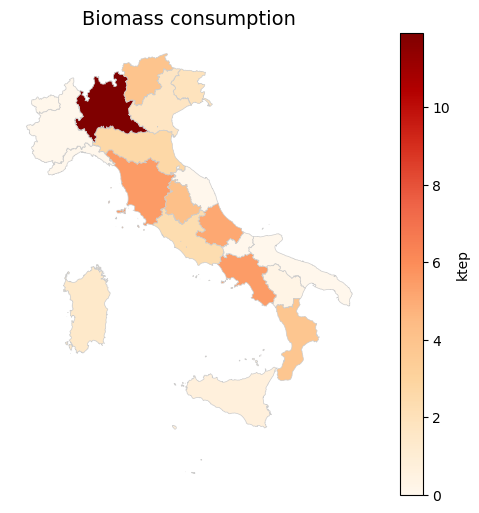

In [16]:
# summary risultati per ogni utente
res = process_results(consumption_appliances, consumption_hvac, buildings_data, 
                      um = 'ktep')
results = res.all

# visualizzazione anno con suddivisione geografica (mappa regioni)
res.heatmap(column = 3) # 0: electricity, 1: gas , 2: gpl , 3: biomass